# CNN Lecture Notebook


## Part 1: Convolutions on an Image
We start with hand-crafted filters to illustrate what convolution actually does. 
These operations are the core building block of CNNs. Each filter acts as a 
pattern detector. By applying several filters we can see how edges, textures, 
and simple structure emerge.

In [3]:
import torch, torch.nn.functional as F
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests

# Load image
url = "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg"
img = Image.open(requests.get(url, stream=True).raw).convert("RGB")

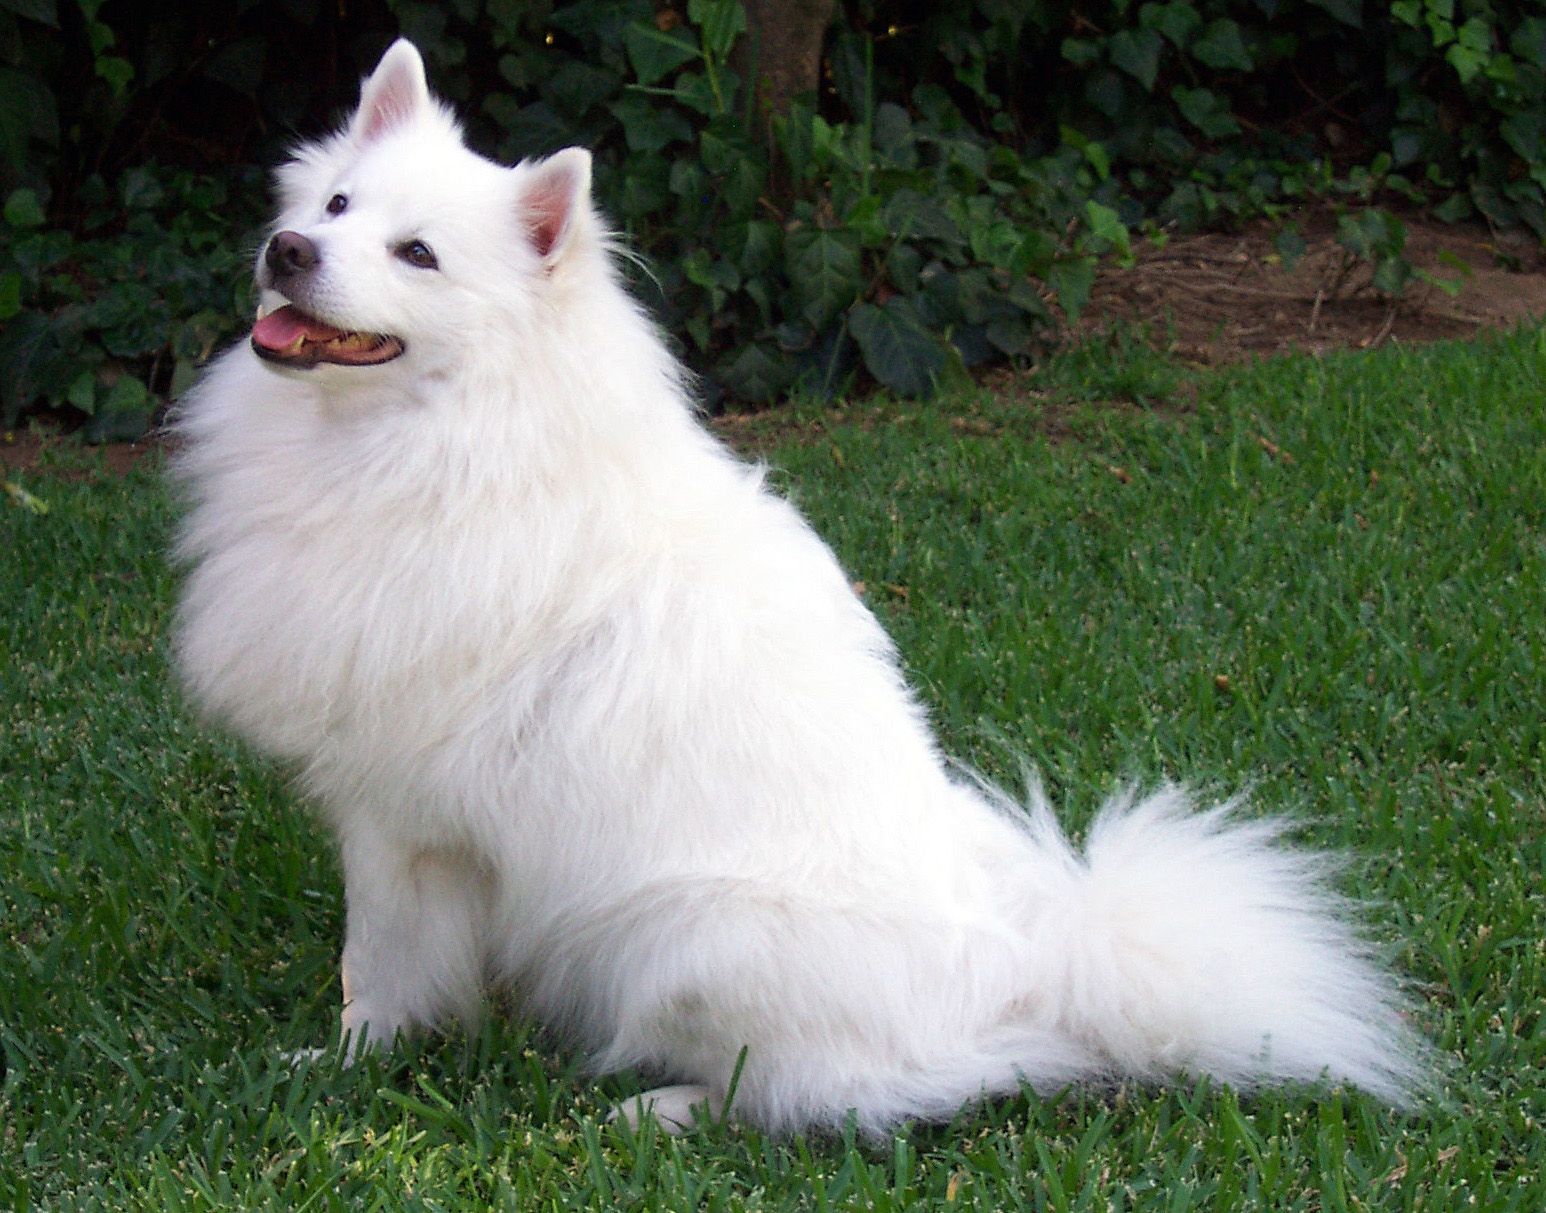

In [91]:
img

In [12]:
img.width * img.height
img_grey = img.convert("L")

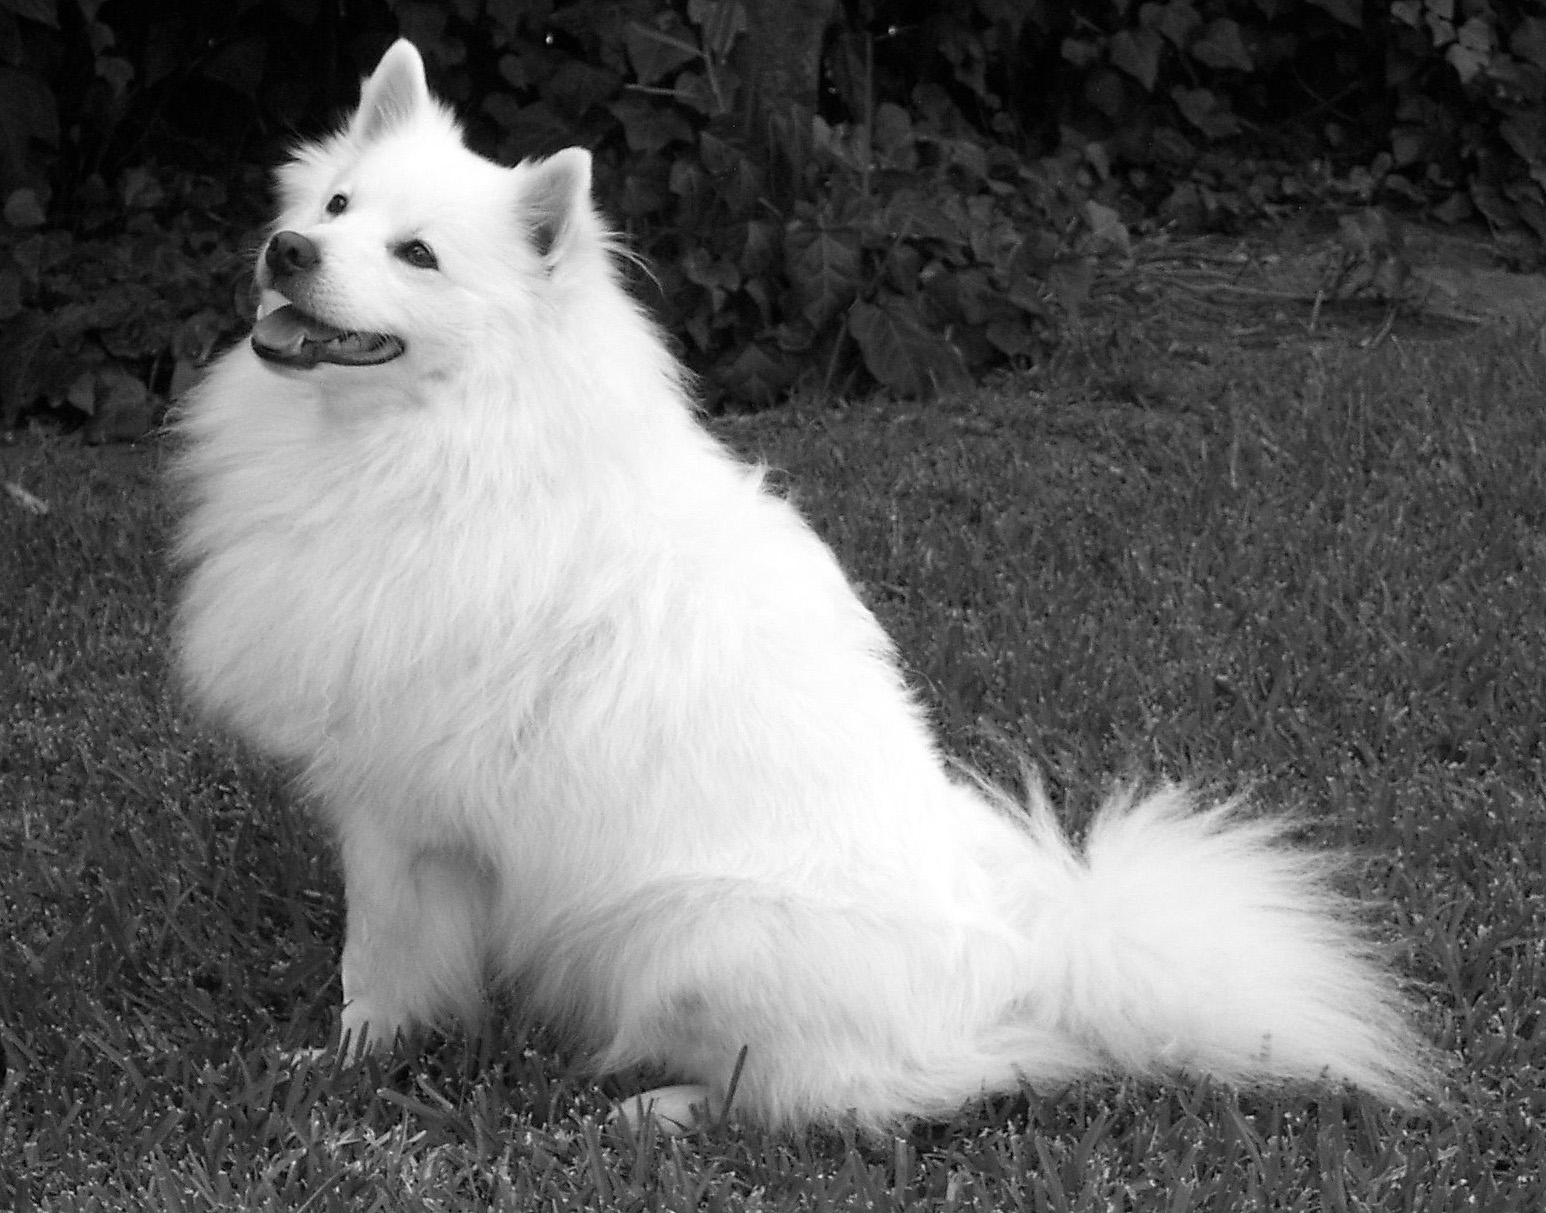

In [13]:
img_grey

In [93]:
transform = T.Compose([T.Resize((256, 256)), T.ToTensor()])
x = transform(img)
x.shape

torch.Size([3, 256, 256])

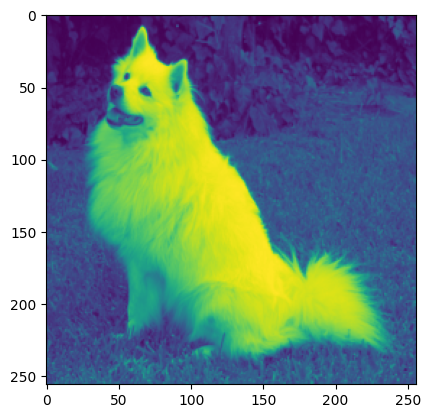

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x.detach().numpy()[0])

In [47]:
sobel_x = torch.Tensor([[[
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]]])

sobel_y = torch.rot90(sobel_x[0,0])[None, None]

sobel_y.shape

torch.Size([1, 1, 3, 3])

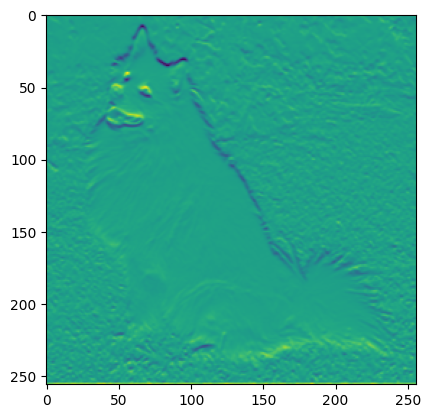

In [48]:
y = F.conv2d(x, sobel_y, padding=1)

plt.imshow(y.detach().numpy()[0])

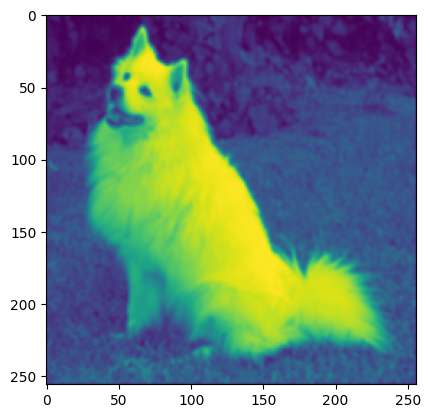

In [62]:
blur = torch.Tensor([[[
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]]])

y = F.conv2d(x, blur, padding=1)

plt.imshow(y.detach().numpy()[0])

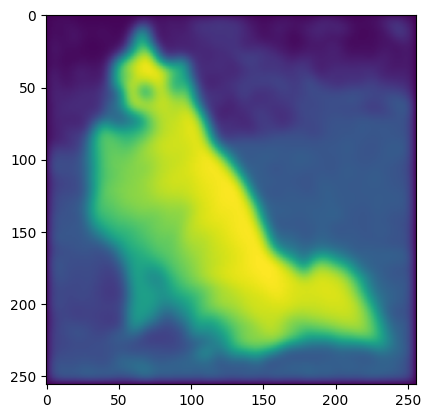

In [65]:
for _ in range(10):
    y = F.conv2d(y, blur / 9, padding=1)

plt.imshow(y.detach().numpy()[0])

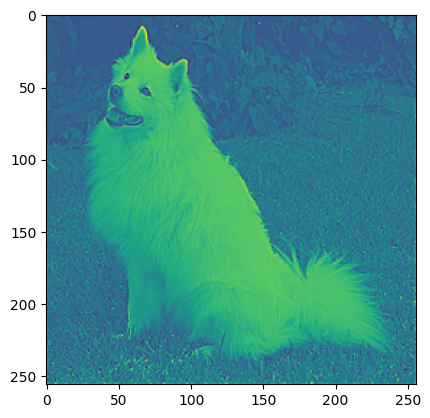

In [68]:
sharpen = torch.Tensor([[[
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]]])

y = F.conv2d(x, sharpen, padding=1)

plt.imshow(y.detach().numpy()[0])


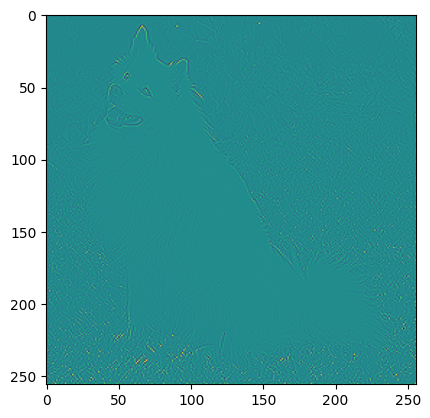

In [69]:

for _ in range(2):
    y = F.conv2d(y, sharpen, padding=1)

plt.imshow(y.detach().numpy()[0])


In [107]:
import torch.nn as nn

class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(16 * 64 * 64, 10)
        
    def forward(self, x):
        x = self.conv1(x)  # [8, s, s] 
        x = F.relu(x)  # nonlinearity
        x = self.pool(x)  
        x = self.conv2(x) 
        x = F.relu(x)
        x = self.pool(x)  # still an image
        x = x.reshape(-1)  # flatten to vector
        return self.fc(x)  # expecting a vector

In [108]:
net = TinyCNN()
net

TinyCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=65536, out_features=10, bias=True)
)

In [145]:
y = net.conv1(x)
y = F.relu(y)
y = net.pool(y)

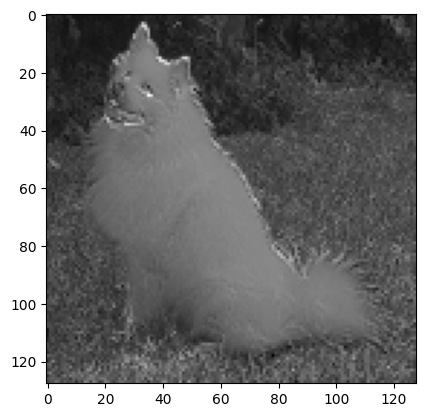

In [150]:
plt.imshow(y.detach().cpu()[3], cmap="grey")

In [152]:
import torchvision.models as models
resnet = models.resnet18(weights="IMAGENET1K_V1")
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  